### Análise Sobre os fatores da Obesidade em uma Amostra da População

###

Primeiro, é possivel perceber que os dados de idade não são números inteiros e, portanto, não é possível fazer um estimativa de valores analisando repetição por si só. Dessa forma, separarei eles em classes alterei os nomes das colunas para melhor entendimento

In [204]:
import pandas as pd

## Importando os Dados

dados_principais = pd.read_csv('obesity.csv', sep = ',')

## Separando as idades (Numeros com casas decimais) em classes

def intervalos(x):
    if(x>=14 and x<22):
        return "entre 14 e 22"
    elif(x>=22 and x<30):
        return "entre 22 e 30"
    if(x>=30 and x<38):
        return "entre 30 e 38"
    if(x>=38 and x<46):
        return "entre 38 e 46"
    if(x>=46 and x<54):
        return "entre 46 e 54"
    if(x>=54 and x<62):
        return "entre 54 e 62"
    
dados_principais['Age'] = list(map(intervalos, dados_principais['Age']))

## Renomeando colunas

dados_principais.rename(columns={'Gender':'Sexo','Age':'Idade','family_history_with_overweight':'Historico_Familiar','NObeyesdad':'Obesidade'},inplace=True)



#

#### Avaliando apenas os obesos

Tentando descobrir um correlação entre os fatores analisados, primeiro foi feita uma separação entre a parte obesa da amostra

In [205]:
Obesos = dados_principais.query('Obesidade == 1')

porcentagem_obesos_por_sexo = (Obesos['Sexo'].value_counts()/dados_principais['Sexo'].value_counts())*100

porcentagem_obesos_por_sexo.index = ['Male','Female']

print(porcentagem_obesos_por_sexo, end = '\n\n')

print("O sexo não se mostrou uma variável relevante para determinar os fatores da obesidade")


Male      45.973783
Female    46.116970
Name: count, dtype: float64

O sexo não se mostrou uma variável relevante para determinar os fatores da obesidade


<small>Nessa primeira análise percebe-se que 45% dos homens são obesos e 46% das mulheres são obesas,  
o que representa, ao menos nessa pesquisa, que o sexo não é um fator relacionado à obesidade,  
já que os dois números são muito próximos.</small>

#

##### Analisando o histórico familiar

In [206]:
porcentagem_obesos_hf = (Obesos['Historico_Familiar'].value_counts()/Obesos.shape[0]) * 100

porcentagem_obesos_hf.index = ['Obesos','Não obesos']

porcentagem_obesos_hf.name = "Histórico Familiar"

print("Esse dado mostra que, dos obesos, 99.17% tinham histórico familiar de obesidade na família")

porcentagem_obesos_hf   

Esse dado mostra que, dos obesos, 99.17% tinham histórico familiar de obesidade na família


Obesos        99.176955
Não obesos     0.823045
Name: Histórico Familiar, dtype: float64

#

#### Cosumo de comida com alta caloria

In [207]:
porcentagem_obesos_cac = (Obesos['FAVC'].value_counts()/Obesos.shape[0])*100

porcentagem_obesos_cac.name = "Consome comida de alta caloria"

porcentagem_obesos_cac.index = ["Consome", "Não consome"]

porcentagem_obesos_cac

Consome        98.045267
Não consome     1.954733
Name: Consome comida de alta caloria, dtype: float64

#

#### Uso de Cigarro

In [208]:
porcentagem_obesos_tabagistas = (Obesos['SMOKE'].value_counts()/Obesos.shape[0])*100

porcentagem_obesos_tabagistas.name = "Fuma"

porcentagem_obesos_tabagistas.index = ["Não Fuma", "Fuma"]

porcentagem_obesos_tabagistas

Não Fuma    97.736626
Fuma         2.263374
Name: Fuma, dtype: float64

#

#### Fazendo isso com todos os dados de uma vez

#### Obesos

In [209]:
## Uma forma mais simples de comparar os resultados com o todo(Obesos)

resultado1 = list()

for x in Obesos.columns:
    aplicar = Obesos[x].value_counts()
    aplicar.name = 'OBESOS'
    resultado1.append((aplicar/Obesos.shape[0])*100)

for x in resultado1:
    print(x, end = '\n\n')



Sexo
1    50.514403
0    49.485597
Name: OBESOS, dtype: float64

Idade
entre 22 e 30    51.543210
entre 14 e 22    27.983539
entre 30 e 38    13.683128
entre 38 e 46     6.584362
entre 46 e 54     0.205761
Name: OBESOS, dtype: float64

Historico_Familiar
1    99.176955
0     0.823045
Name: OBESOS, dtype: float64

FAVC
1    98.045267
0     1.954733
Name: OBESOS, dtype: float64

FCVC
3.000000    38.683128
2.000000    18.004115
1.000000     0.411523
2.758394     0.205761
2.967300     0.205761
              ...    
2.490776     0.102881
2.312825     0.102881
2.348745     0.102881
2.393837     0.102881
2.680375     0.102881
Name: OBESOS, Length: 416, dtype: float64

NCP
3.000000    69.753086
1.000000     4.012346
1.213431     0.102881
2.986637     0.102881
1.924168     0.102881
              ...    
1.000414     0.102881
1.135278     0.102881
2.463113     0.102881
1.782109     0.102881
1.089048     0.102881
Name: OBESOS, Length: 257, dtype: float64

CAEC
1    98.148148
2     0.823045
3     

#### Não obesos

In [210]:
nao_obesos = dados_principais.query('Obesidade == 0')

resultado2 = list()

for x in nao_obesos.columns:
    aplicar = nao_obesos[x].value_counts()
    aplicar.name = 'Não Obesos'
    resultado2.append((aplicar/nao_obesos.shape[0])*100)

for x in resultado2:
    print(x, end = '\n\n')

Sexo
1    50.658472
0    49.341528
Name: Não Obesos, dtype: float64

Idade
entre 14 e 22    59.086918
entre 22 e 30    26.426690
entre 30 e 38    10.272169
entre 38 e 46     3.248464
entre 54 e 62     0.614574
entre 46 e 54     0.351185
Name: Não Obesos, dtype: float64

Historico_Familiar
1    66.90079
0    33.09921
Name: Não Obesos, dtype: float64

FAVC
1    80.158033
0    19.841967
Name: Não Obesos, dtype: float64

FCVC
2.000000    37.313433
3.000000    24.231782
1.000000     2.546093
2.392665     0.175593
2.714447     0.175593
              ...    
2.673638     0.087796
1.118436     0.087796
1.649974     0.087796
1.036414     0.087796
2.076689     0.087796
Name: Não Obesos, Length: 406, dtype: float64

NCP
3.000000    46.093064
1.000000    14.047410
4.000000     5.970149
1.737620     0.175593
3.559841     0.175593
              ...    
3.985442     0.087796
1.578521     0.087796
3.131032     0.087796
1.394539     0.087796
1.313403     0.087796
Name: Não Obesos, Length: 383, dtype: f

#

#### Juntando os dados em um Dataframe para melhor comparação

In [211]:
final = list()

for x in range(len(resultado1)):
    final.append(pd.concat([resultado1[x],resultado2[x]],axis = 1))

final.pop()

for x in final:
    display(x.head())

,OBESOS,Não Obesos
Sexo,,
1,50.514403,50.658472
0,49.485597,49.341528


,OBESOS,Não Obesos
Idade,,
entre 22 e 30,51.543210,26.426690
entre 14 e 22,27.983539,59.086918
entre 30 e 38,13.683128,10.272169
entre 38 e 46,6.584362,3.248464
entre 46 e 54,0.205761,0.351185


,OBESOS,Não Obesos
Historico_Familiar,,
1,99.176955,66.90079
0,0.823045,33.09921


,OBESOS,Não Obesos
FAVC,,
1,98.045267,80.158033
0,1.954733,19.841967


,OBESOS,Não Obesos
FCVC,,
3.000000,38.683128,24.231782
2.000000,18.004115,37.313433
1.000000,0.411523,2.546093
2.758394,0.205761,NaN
2.967300,0.205761,NaN


,OBESOS,Não Obesos
NCP,,
3.000000,69.753086,46.093064
1.000000,4.012346,14.047410
1.213431,0.102881,NaN
2.986637,0.102881,NaN
1.924168,0.102881,NaN


,OBESOS,Não Obesos
CAEC,,
1,98.148148,71.202809
2,0.823045,20.544337
3,0.823045,3.950834
0,0.205761,4.302019


,OBESOS,Não Obesos
SMOKE,,
0,97.736626,98.068481
1,2.263374,1.931519


,OBESOS,Não Obesos
CH2O,,
2.000000,7.818930,32.660228
1.000000,5.864198,13.520632
3.000000,5.452675,9.569798
2.184707,0.205761,NaN
2.530035,0.205761,NaN


,OBESOS,Não Obesos
SCC,,
0,99.691358,91.834943
1,0.308642,8.165057


,OBESOS,Não Obesos
FAF,,
0.000000,20.164609,18.876207
1.000000,4.218107,16.944688
2.000000,1.851852,14.486392
3.000000,1.337449,5.443371
1.399183,0.205761,NaN


,OBESOS,Não Obesos
TUE,,
0.000000,20.987654,30.992098
1.000000,4.835391,21.510097
2.000000,2.777778,7.199298
0.002600,0.308642,NaN
0.630866,0.308642,0.087796


,OBESOS,Não Obesos
CALC,,
1,73.971193,59.877085
0,24.382716,35.294118
2,1.646091,4.741001
3,NaN,0.087796


,OBESOS,Não Obesos
Automobile,,
0,78.806584,77.963126
1,21.193416,22.036874


,OBESOS,Não Obesos
Bike,,
0,99.897119,99.473222
1,0.102881,0.526778


,OBESOS,Não Obesos
Motorbike,,
0,99.691358,99.297629
1,0.308642,0.702371


,OBESOS,Não Obesos
Public_Transportation,,
1,78.08642,72.080773
0,21.91358,27.919227


,OBESOS,Não Obesos
Walking,,
0,99.691358,95.346795
1,0.308642,4.653205


#

#

### Gráficos

In [212]:
import matplotlib.pyplot as plt
import numpy as np

#

#### Idade

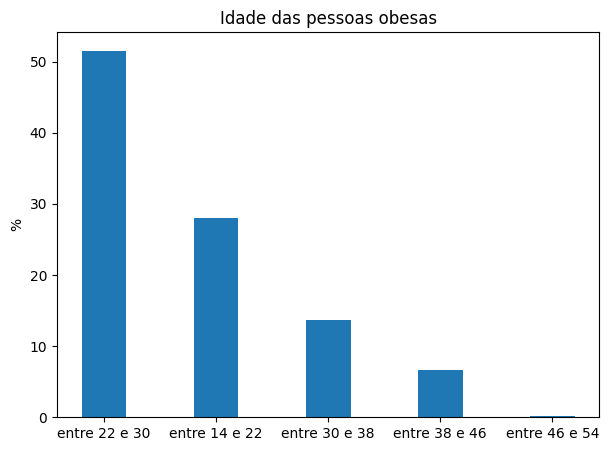

In [213]:
plt.figure(figsize=(7,5))

plt.ylabel('%')
plt.title('Idade das pessoas obesas')

Pessoas_Obesas = plt.bar(np.array(final[1]['OBESOS'].index),final[1]['OBESOS'].values,width=0.4)


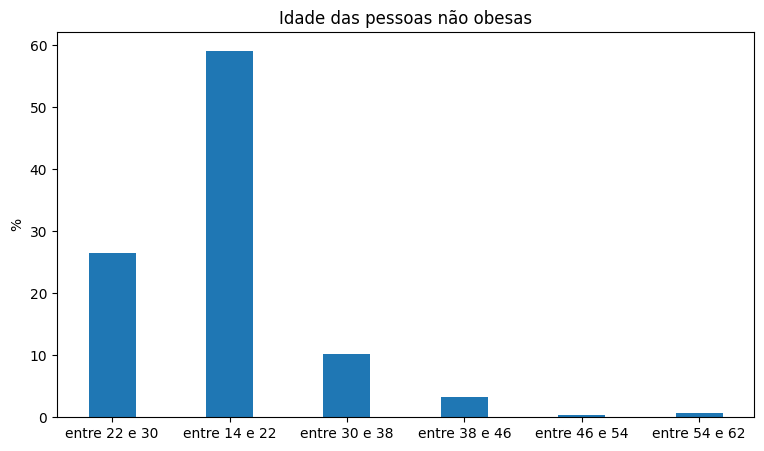

In [214]:
plt.figure(figsize=(9,5))
plt.ylabel('%')
plt.title('Idade das pessoas não obesas')

Pessoas_Nao_Obesas = plt.bar(np.array(final[1]['Não Obesos'].index),final[1]['Não Obesos'].values,width=0.4)

#### Histórico Familiar

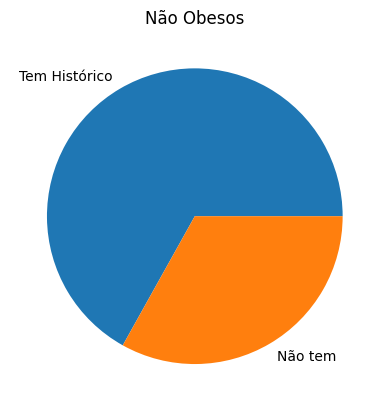

In [223]:
plt.title('Não Obesos')
Nao_obesos = plt.pie(final[2]['Não Obesos'], labels = ['Tem Histórico', 'Não tem'])

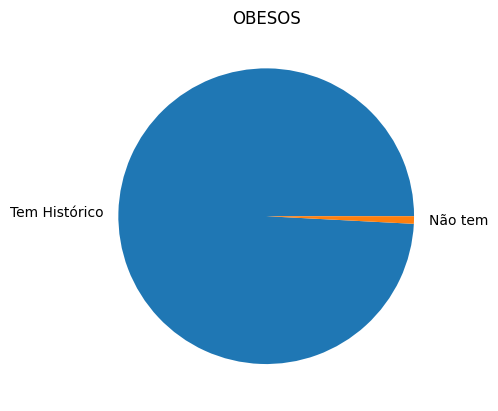

In [224]:
plt.title('OBESOS')
Obesos = plt.pie(final[2]['OBESOS'], labels = ['Tem Histórico', 'Não tem'])